# Analysing Employee Exit Surveys of 2 Australian Educational Institutes

In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The TAFE exit survey can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey). <br> <br>
In this project, we'll try to answer the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Summary table
**[1 Initial Data Exploration](#section1) <br>
  [2 First Data Cleaning Steps](#section2) <br>
  [3 Selecting the Data Related to Employees who Resigned Only](#section3) <br>
  [4 Checking for Logical Consistency of the Years](#section4) <br>
  [5 Creating a Column for Years of Service in the DETE Dataframe](#section5) <br>
  [6 Identifying Dissatisfied Employees](#section6) <br>
  [7 Combining both Dataframes](#section7) <br>
  [8 Categorization of the Resignees by their Years of Service](#section8) <br>
  [9 Dissatisfied Resignees According to their Years of Service](#section9) <br>
  [10 Dissatisfaction per Age Group](#section10) <br>
  [11 Conclusion](#section11)**

<a id='section1'></a>
# 1 Initial Data Exploration
First, we can open the files with Excel to get an idea about the meaning of the columns. <br><br>
A quick look at the data gave us an understanding of some substantial columns we'll work with. We deduce from our first exploration the meaning of the following columns from the `dete_survey.csv`:

- `SeparationType`: The reason why the person's employment ended
- `Cease Date`: The year or month the person's employment ended
- `DETE Start Date`: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

- `Reason for ceasing employment`: The reason why the person's employment ended
- `LengthofServiceOverall. Overall Length of Service at Institute (in years)`: The length of the person's employment (in years)

Next, let's get more information using pandas library.

In [50]:
import pandas as pd
import numpy as np

In [51]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [52]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [53]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [54]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [55]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

Few observations:

- The `dete_survey` dataframe contains `Not Stated` values that indicate values are missing, but they aren't represented as `NaN`.
- Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

Therefore, in next section we'll perform the following tasks:
- Read again the `dete_survey.csv` file into pandas with capturing the "Not Stated" values as NaN
- Remove the unnecessary columns for our analysis
- Renaming some columns of the `tafe_survey` dataframe to match the names in `dete_survey`

<a id='section2'></a>
# 2 First Data Cleaning Steps

In [56]:
# Reading the dete_survey.csv CSV file into pandas again, but this time reading the Not Stated values in as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

In [57]:
# dropping non relevant columns to our analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

## Renaming Columns
Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

| dete_survey | tafe_survey   | Definition |
| :- | :- | :- |
| ID          | Record ID     | An id used to identify the participant of the survey       |
| SeparationType  | Reason for ceasing employment   | The reason why the participant's employment ended       |
| Cease Date      | CESSATION YEAR     | The year or month the participant's employment ended       |
| DETE Start Date          |     | The year the participant began employment with the DETE      |
| | LengthofServiceOverall.Overall Length of Service at Institute (in years) | The length of the person's employment (in years) |
| Age          | CurrentAge. Current Age     | The age of the participant       |
| Gender          | Gender. What is your Gender?     | The gender of the participant       |

Because we eventually want to combine them, we'll have to standardize the column names. <br><br>
The following criteria to update the column names will be considered:
   * Make all the capitalization lowercase.
   * Remove any trailing whitespace from the end of the strings.
   * Replace spaces with underscores ('_').


In [58]:
# Clean the column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

# Check that the column names were updated correctly
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [59]:
# Update column names to match the names in dete_survey_updated
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status',
       'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

# Check that the specified column names were updated correctly
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

<a id='section3'></a>
# 3 Selecting the Data Related to Employees who Resigned Only
Let's first have a look at the `separationtype` column to see the different rationales for people leaving both institutes.

In [60]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [61]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string `Resignation`.

In [62]:
resignations = dete_survey_updated['separationtype'].str.contains('Resignation')
dete_resignations = dete_survey_updated[resignations].copy()

In [63]:
resignations = tafe_survey_updated['separationtype'].str.contains('Resignation', na = False)
tafe_resignations = tafe_survey_updated[resignations].copy()

<a id='section4'></a>
# 4 Checking for Logical Consistency of the Years
Now, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense. 

- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [64]:
# checking the list of values in the 'cease_date' column of dete_resignations
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
07/2012      1
2010         1
09/2010      1
Name: cease_date, dtype: int64

In [65]:
# extracting the year from each value of the 'cease_date' column
pattern = r"(20[0-9][0-9])"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern).astype(float)
dete_resignations['cease_date'].sort_index(ascending=True).value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [66]:
# checking the list of values in the 'cease_date' column of tafe_resignations
tafe_resignations['cease_date'].sort_index(ascending=True).value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [67]:
# checking the list of values in the 'dete_start_date' column of dete_resignations
dete_resignations['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

We can conclude the following:
- There aren't any major issues with the years.
- The years in each dataframe don't span quite the same number of years. But this is not a real issue for our analysis. <br><br>

Therefore we won't make any change on these columns

<a id='section5'></a>
# 5 Creating a Column for Years of Service in the DETE Dataframe
As we're interested in the length of time an employee spent in a workplace (referred to as years of service), it's worth creating a proper column for that in `dete_resignations`. <br>
The `tafe_resignations` dataframe already contains a "service" column, which we renamed to `institute_service`. So let's create the same column in `dete_resignations`.

In [68]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

<a id='section6'></a>
# 6 Identifying Dissatisfied Employees
Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe.

1. tafe_survey_updated:
    - `Contributing Factors. Dissatisfaction`
    - `Contributing Factors. Job Dissatisfaction` <br> <br>
2. dete_survey_updated:
    - `job_dissatisfaction`
    - `dissatisfaction_with_the_department`
    - `physical_work_environment`
    - `lack_of_recognition`
    - `lack_of_job_security`
    - `work_location`
    - `employment_conditions`
    - `work_life_balance`
    - `workload`

If the employee indicated any of the factors above caused them to resign, we'll mark them as `dissatisfied` in a new column. <br>
After our changes, the new `dissatisfied` column will contain just the following values:
- `True`: indicates a person resigned because they were dissatisfied with the job
- `False`: indicates a person resigned because of a reason other than dissatisfaction with the job
- `NaN`: indicates the value is missing


In [69]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [70]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [71]:
# function to convert a value to True, False or NaN
def update_vals(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True

In [72]:
tafe_cols = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
tafe_resignations[tafe_cols] = tafe_resignations[tafe_cols].applymap(update_vals)

In [73]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [74]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [75]:
# If any of the columns listed above in tafe_cols contain a True value, we add a True value to the 'dissatisfied' column
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_cols].any(axis = 1, skipna = False)

In [76]:
dete_cols = [
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload',
]

In [77]:
# If any of the columns listed above in dete_cols contain a True value, we add a True value to the 'dissatisfied' column
dete_resignations['dissatisfied'] = dete_resignations[dete_cols].any(axis = 1, skipna = False)

In [78]:
dete_resignations_up = dete_resignations.copy()

In [79]:
tafe_resignations_up = tafe_resignations.copy()

In [80]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
True       8
Name: dissatisfied, dtype: int64

For some reason, the `NaN` value appears as `True`! It seems to be a bug.

In [81]:
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

<a id='section7'></a>
# 7 Combining both Dataframes
To make the analysis easier, we'll aggregate the data according to the `institute_service` column (which indicates the years of service). First we'll add a column named `institute` to each dataframe that will allow us to easily distinguish between the two. <br>
Then, we'll combine the dataframes and drop any remaining columns we don't need. We've decided to drop any columns with less than 500 non null values.

In [82]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [83]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

<a id='section8'></a>
# 8 Categorization of the Resignees by their Years of Service
Let's look at the different values in the `institute service` column.

In [84]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
14.0                   6
12.0                   6
17.0                   6
22.0                   6
10.0                   6
16.0                   5
18.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


The `institute_service` column is tricky to clean because it currently contains values in a couple different forms. <br>
To analyze the data, we'll convert these numbers into categories.

We'll propose the below grouping:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company


In [85]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [86]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

<a id='section9'></a>
# 9 Dissatisfied Resignees According to their Years of Service
Based on the categorization we created, we'll look at the proportion of resignees for each category.

In [87]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
True       8
Name: dissatisfied, dtype: int64

In [88]:
# replacing the missing values in the dissatisfied column with the most frequent value, False
combined_updated['dissatisfied'].fillna(False,inplace=True)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [89]:
%matplotlib inline

In [90]:
combined_updated.pivot_table('dissatisfied', 'service_cat')

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


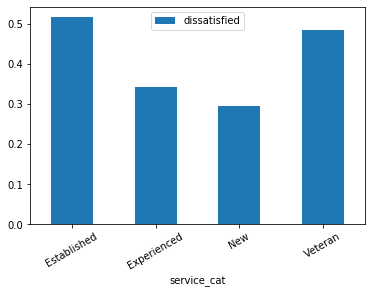

In [91]:
combined_updated.pivot_table('dissatisfied', 'service_cat').plot(kind='bar', rot = 30)

This suggests people with more than 7 years of service are more likely to leave due to some dissatisfaction.

Now, let's see the impact of the age on dissatisfaction.

<a id='section10'></a>
# 10 Dissatisfaction per Age Group
Now, let's try to answer the second question we raised in the introduction:
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [92]:
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
26  30           32
36  40           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

We can see the ages are already grouped. Nevertheless, this column needs two cleaning tasks:
- Some groups are identified as different but are actually same, just sometimes there is a dash instead of a space.
- Group the ages in wider ranges. We propose the following:
    - Up to 36
    - 36-51
    - More than 51

In [93]:
combined_updated['age_up'] = combined_updated['age'].astype('str').str.extract(r'(\d+)')
combined_updated['age_up'] = combined_updated['age_up'].astype('float')

In [94]:
combined_updated['age_up'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age_up, dtype: int64

In [95]:
# Redefining age groups
def group_age(val):
    if val >= 51:
        return "51 and above"
    elif 36 <= val < 51:
        return "36-50"
    elif val < 36:
        return "Up to 35"
    elif pd.isnull(val):
        return np.nan

combined_updated['age_cat'] = combined_updated['age_up'].apply(group_age)

# Quick check of the update
combined_updated['age_cat'].value_counts(dropna=False)

36-50           247
Up to 35        200
51 and above    149
NaN              55
Name: age_cat, dtype: int64

In [96]:
combined_updated.pivot_table('dissatisfied', 'age_cat').iloc[[2,0,1]]

,dissatisfied
age_cat,
Up to 35,0.360000
36-50,0.368421
51 and above,0.422819


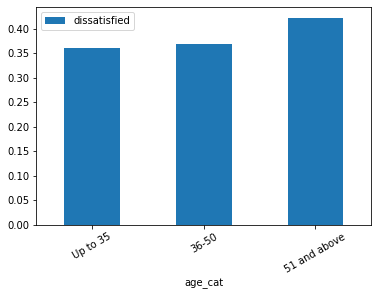

In [97]:
combined_updated.pivot_table('dissatisfied', 'age_cat').iloc[[2,0,1]].plot(kind='bar', rot = 30)

The contrast between age groups in terms of dissatisfaction is less pronounced in comparison with the career stage factor, even though resignees above the age of 51 seem more dissatisfied. However this last observation may be correlated by the years of service factor as well, as employees with long experience at the institutes are usually older.

<a id='section11'></a>
# 11 Conclusion
We can conlude from our analyis that employees who stayed longer in the institutes are more likely to leave for a dissatisfaction reason. <br> Dissatisfaction seems not to be really correlated with the age of resignees. Although elder employees are more likely to leave due to dissatisfaction, this may be understood because of their long experience within the institute, not their age.<br> <br>
Our anlaysis is consistent with a [study conducted by SMS Research Advisors](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.